<a href="https://colab.research.google.com/github/Kibika/Cardio-Fitness/blob/main/Cardio_Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months.


Data Dictionary;

Product: Product purchased - TM195, TM498, or TM798

Gender: Male or Female

Age: Age of the customer in years

Education: Education of the customer in years

MaritalStatus: Single or partnered

Income: Annual household income

Usage: The average number of times the customer plans to use the treadmill each week;

Miles: The average number of miles the customer expects to walk/run each week;

Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

#Defining Problem

Adright produces different kinds of treadmills and needs to know what type of customer buys a given type of treadmill

#Solution
Perform EDA. We will use the power of visualization plots in seaborn to show the characteristics of the different customers.

# Outcome
There are subtle differences that would require advanced methods such as ANOVA to be able to tell the significance of the differences.

However based on a simple EDA analysis we can conclude that;


1.   The people buying TM195 AND TM498 have quite similar profiles. They are partnered individuals of either gender with an education level of 14 or 16. Fitness level of 3 and an income of 50000 on average and mileage of 90 on average.
2.   The people buying TM798 are partnered male individuals with high income who expect to use the product more and are in excellent shape.




In [1]:
# import libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# import the data
data = pd.read_csv("/content/drive/My Drive/MIT/Introduction to Python/Cardio Goodness Fit Case Study/CardioGoodFitness.csv")
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [16]:
# separate numerical and categorial variables
numerical_vars = ["Age", "Income", "Miles"]
categorical_vars = ["Gender", "MaritalStatus", "Fitness", "Education", "Usage"]

TM195 treadmill had the highest number of sales

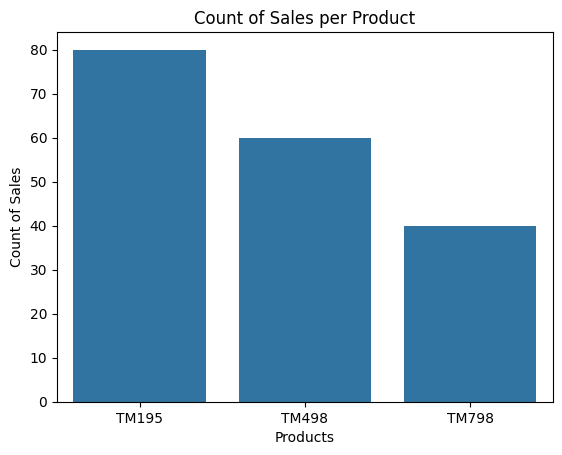

In [4]:
# distribution of types of treadmills

# Create the count plot
sns.countplot(x='Product', data=data)

# Add a title and labels
plt.title('Count of Sales per Product')
plt.xlabel('Products')
plt.ylabel('Count of Sales')

# Show the count plot
plt.show()

We can have a high level overview of the variables and how they relate to the three products.

TM195

Is preferred by partnered individuals of any gender and average age 25. Their usage and fitness level is 3 and their education level is mostly 16 or 14. Their income level is on average 50000 and they record a mileage of close to 90 on average

TM498

The profile of these users is quite similar to the TM195 customers with a slightly higher income level and slightly higher preference for male individuals compared to femal individuals

TM798

These user profile is of male partnered individuals of age 25 on average. They have a usage level of 4 and a fitness level of 5, education level between 16 to 18. They are individuals with higher income, on average 80000 and record more miles on average, 90 miles.

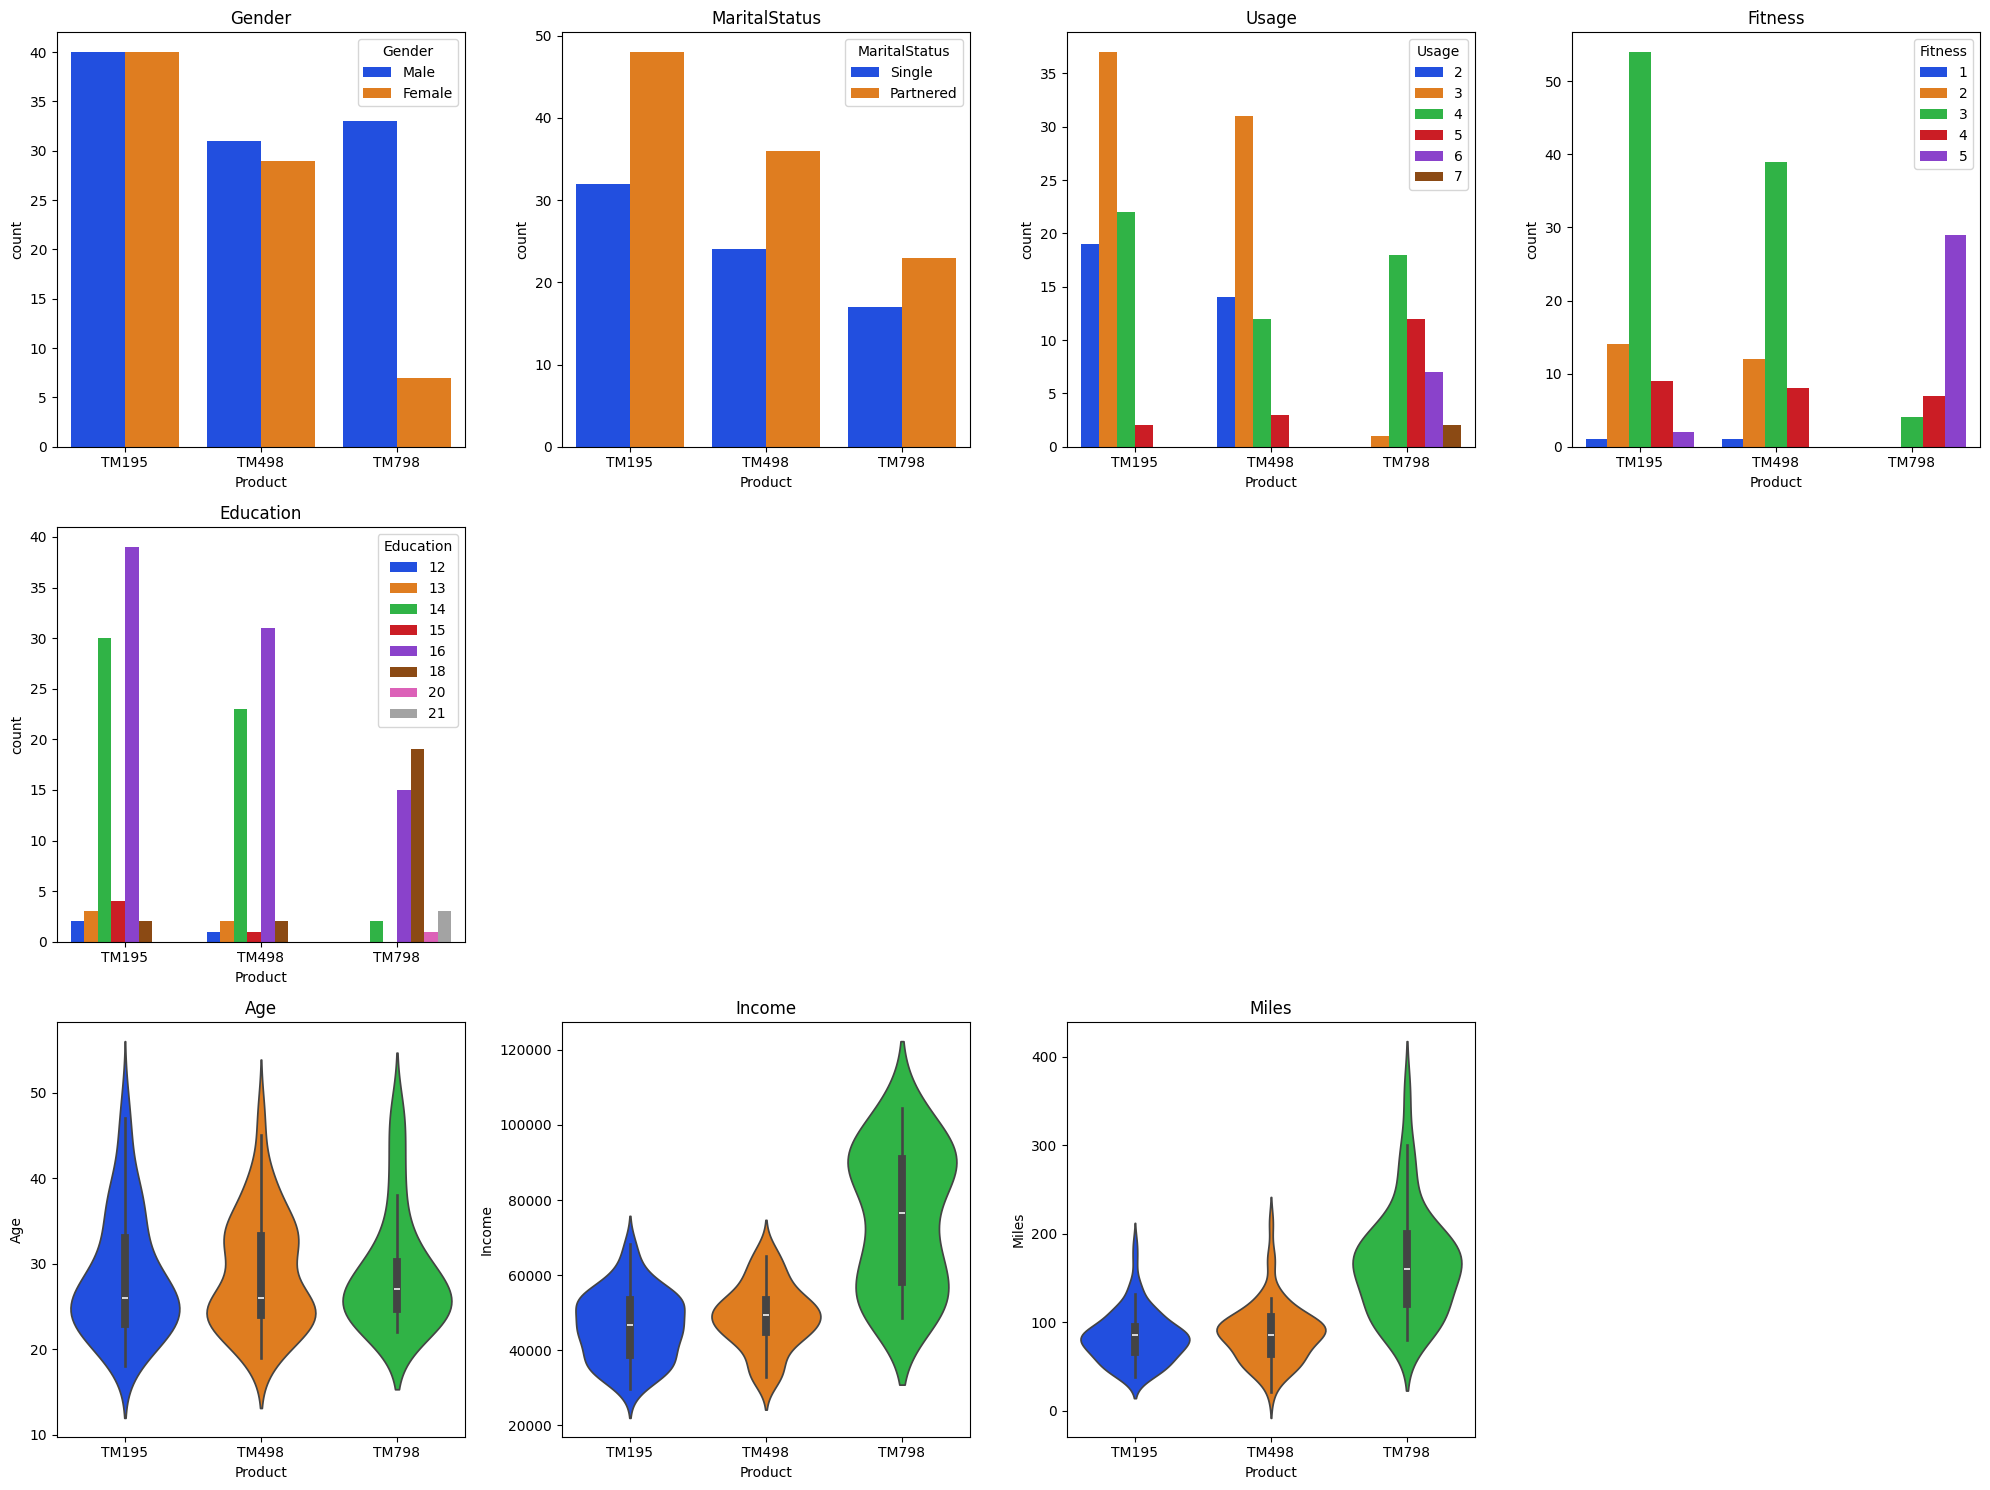

In [43]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Plot countplots for each category
sns.countplot(ax=axes[0,0], x='Product', data=data, hue='Gender', palette='bright')
axes[0,0].set_title('Gender')

sns.countplot(ax=axes[0,1], x='Product', data=data, hue='MaritalStatus', palette='bright')
axes[0,1].set_title('MaritalStatus')

sns.countplot(ax=axes[0,2], x='Product', data=data, hue='Usage', palette='bright')
axes[0,2].set_title('Usage')

sns.countplot(ax=axes[0,3], x='Product', data=data, hue='Fitness', palette='bright')
axes[0,3].set_title('Fitness')

sns.countplot(ax=axes[1,0], x='Product', data=data, hue='Education', palette='bright')
axes[1,0].set_title('Education')

# Plot violin plots for each continuous variable
sns.violinplot(ax=axes[2,0], x='Product', y='Age', data=data, hue='Product', palette='bright')
axes[2,0].set_title('Age')

sns.violinplot(ax=axes[2,1], x='Product', y='Income', data=data, hue='Product', palette='bright')
axes[2, 1].set_title('Income')

sns.violinplot(ax=axes[2,2], x='Product', y='Miles', data=data, hue='Product', palette='bright')
axes[2, 2].set_title('Miles')


# Turn off the empty subplot
axes[1, 1].axis('off')
axes[1, 2].axis('off')
axes[1, 3].axis('off')
axes[2, 3].axis('off')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

We can also have a more granular analysis to show the differences explained above explicitly.

# Income
The TM798 is preferred by individuals with higher income.

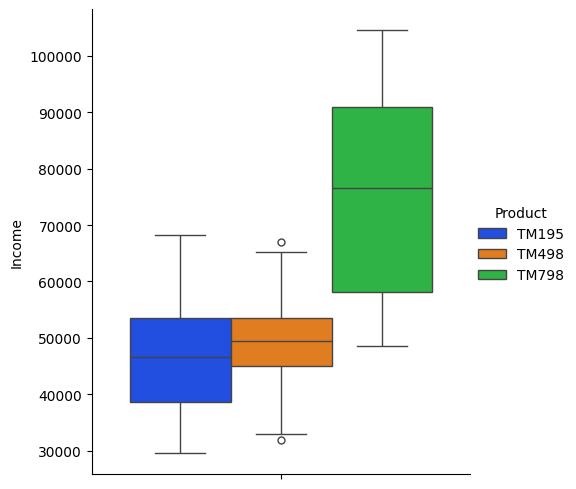

In [74]:
sns.catplot(data=data, y="Income", hue="Product", palette="bright", kind="box")


We can go further and identify the characteristics of the users in different categories. With this information we can know the income of people based on the categorical variables. We can then use this information to know which products new users would prefer.

Let us profile a TM195 User by looking at income levels of the categorical variables.

From the graph above they have an average income of about 45000.

People in
*   Usage level 2-3
*   Female individuals
*   Single individuals
*   Fitness level 2

have about the same average income.

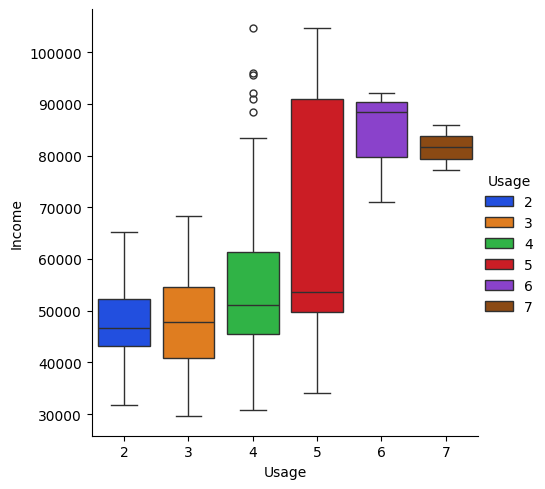

In [75]:
sns.catplot(data=data, x="Usage", y="Income", hue="Usage", palette="bright", kind="box")


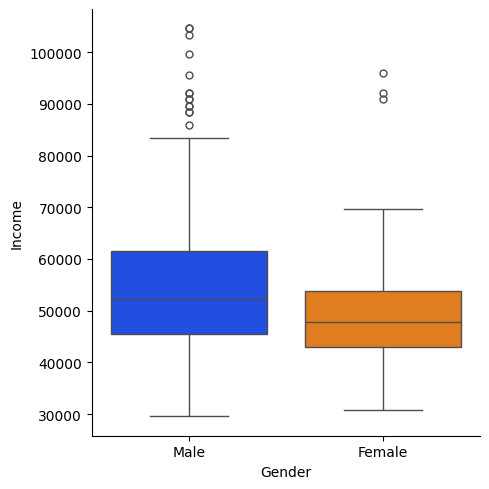

In [78]:
sns.catplot(data=data, x="Gender", y="Income", hue="Gender", palette="bright", kind="box")


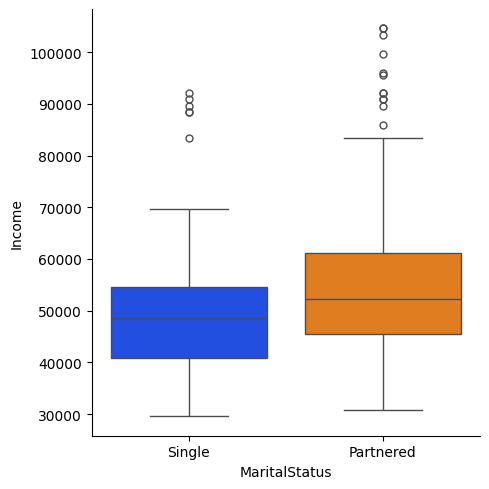

In [76]:
sns.catplot(data=data, x="MaritalStatus", y="Income", hue="MaritalStatus", palette="bright", kind="box")


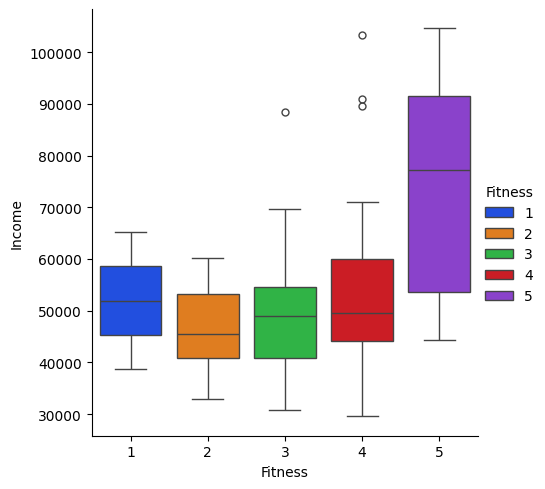

In [77]:
sns.catplot(data=data, x="Fitness", y="Income", hue="Fitness", palette="bright", kind="box")


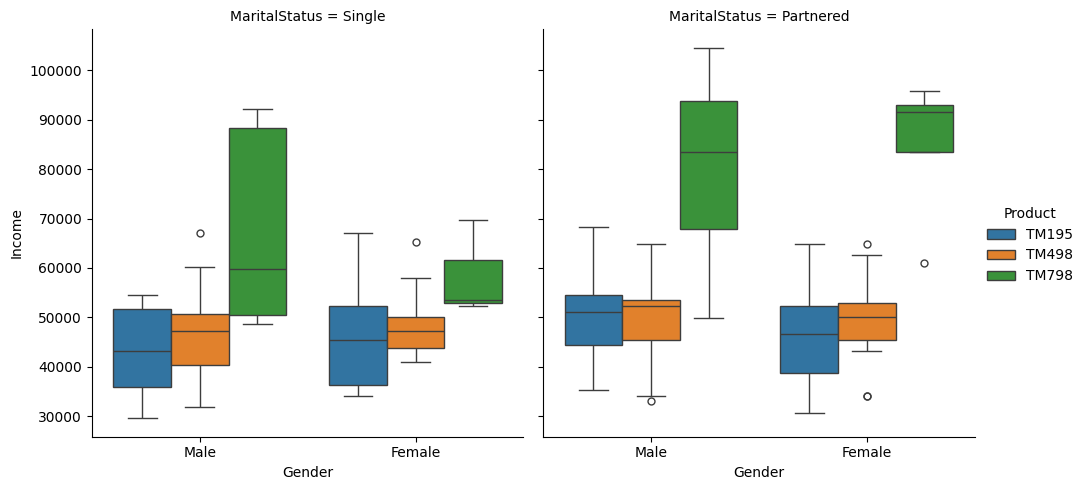

In [44]:
sns.catplot(data=data, x="Gender", y="Income", hue="Product", palette="bright", col="MaritalStatus", kind="box")

# Age
We can now see the differences in age more clearly. The average age of TM798 users is slightly higher.

Let us continue to profile a TM195 user based on age.

They are about 25 years in age
*   They fall within usage level 2, 3, and 5
*   They could be male or female
*   Single
*   Fitness level 2, 3 or 4

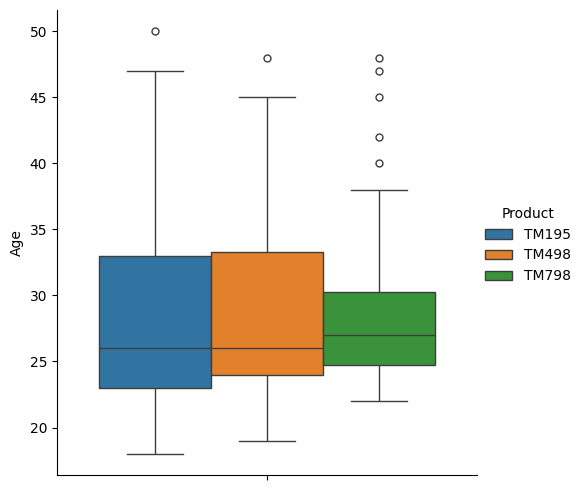

In [50]:
sns.catplot(data=data, y="Age", hue="Product", palette="bright", kind="box")

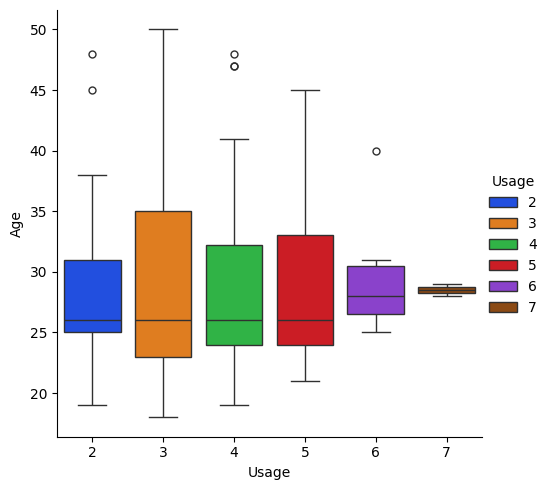

In [67]:
sns.catplot(data=data, x="Usage", y="Age", hue="Usage", palette="bright", kind="box")

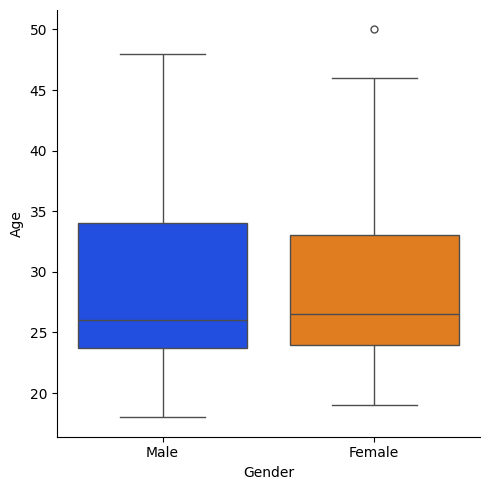

In [86]:
sns.catplot(data=data, x="Gender", y="Age", hue="Gender", palette="bright", kind="box")


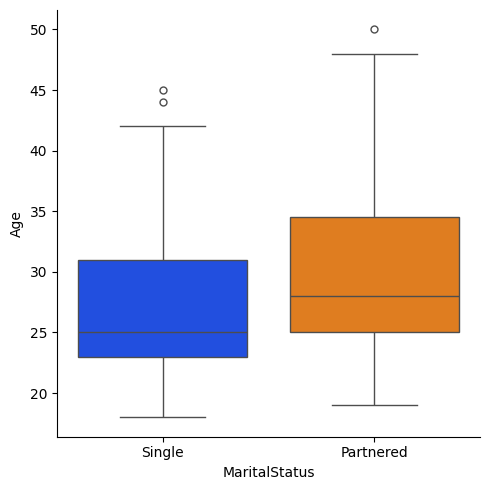

In [87]:
sns.catplot(data=data, x="MaritalStatus", y="Age", hue="MaritalStatus", palette="bright", kind="box")

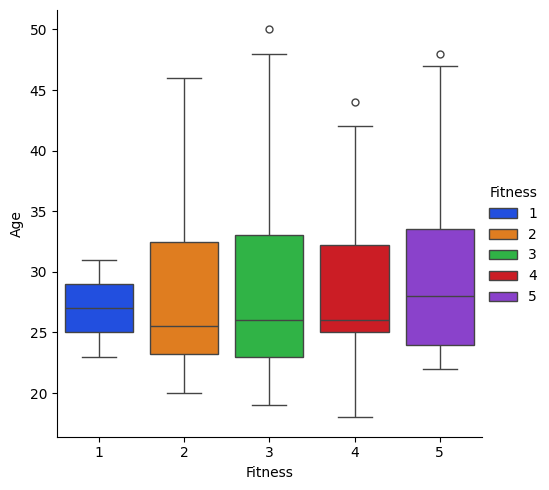

In [88]:
sns.catplot(data=data, x="Fitness", y="Age", hue="Fitness", palette="bright", kind="box")

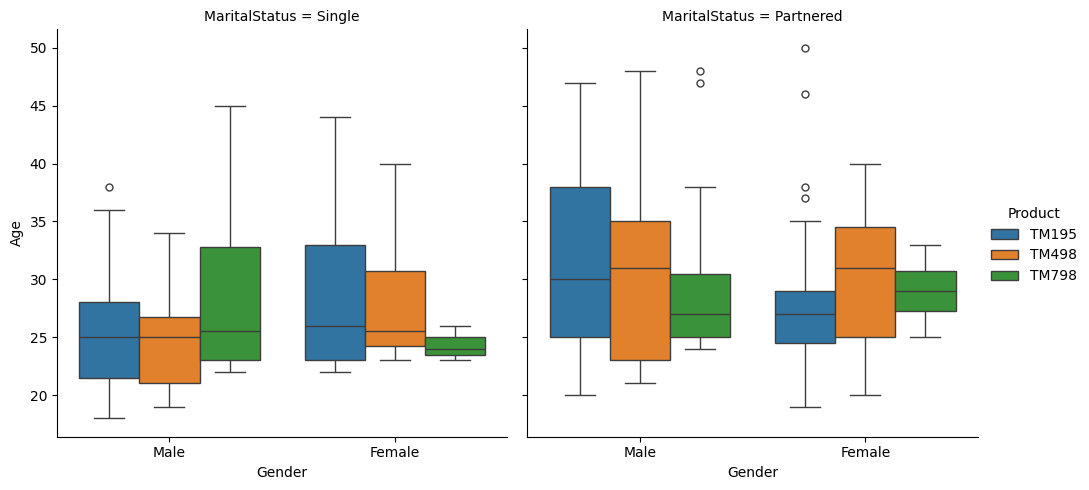

In [47]:
sns.catplot(data=data, x="Gender", y="Age", hue="Product", palette="bright", col="MaritalStatus", kind="box")

# Miles
Profile a TM195 user based on miles

They have an average of 90 miles

*  Usage level 3
*  Either male or female
*  Either single or partnered
*  Fitness level 3





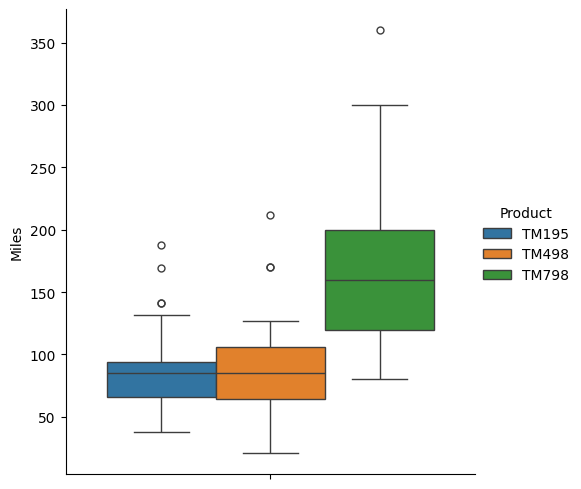

In [52]:
sns.catplot(data=data, y="Miles", hue="Product", palette="bright", kind="box")

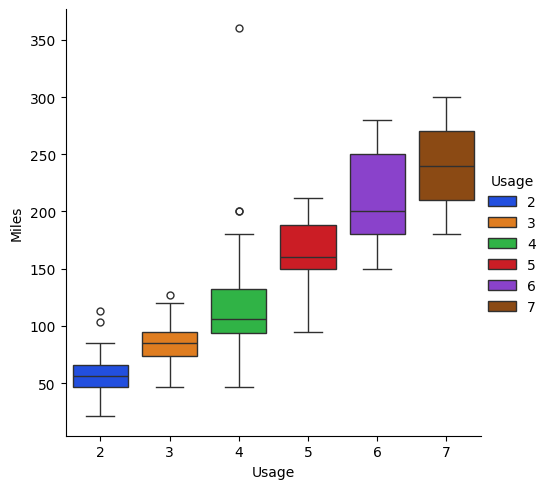

In [85]:
sns.catplot(data=data, x="Usage", y="Miles", hue="Usage", palette="bright", kind="box")

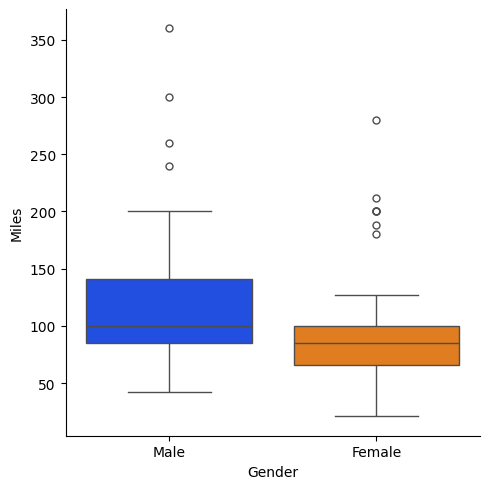

In [84]:
sns.catplot(data=data, x="Gender", y="Miles", hue="Gender", palette="bright", kind="box")

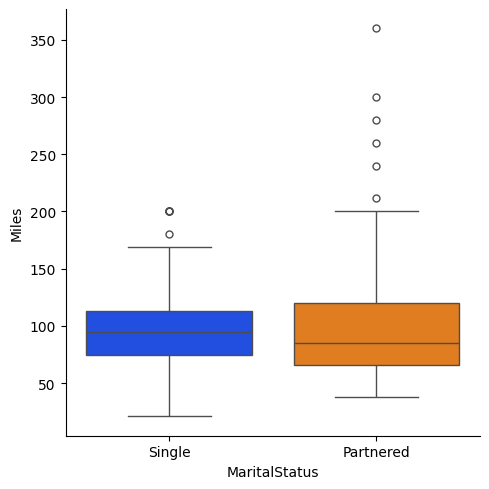

In [83]:
sns.catplot(data=data, x="MaritalStatus", y="Miles", hue="MaritalStatus", palette="bright", kind="box")

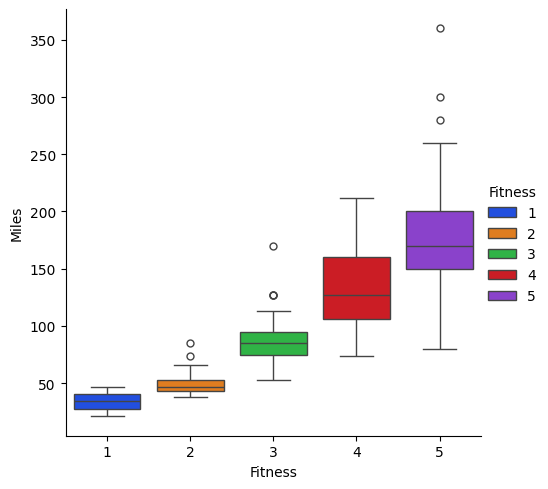

In [82]:
sns.catplot(data=data, x="Fitness", y="Miles", hue="Fitness", palette="bright", kind="box")

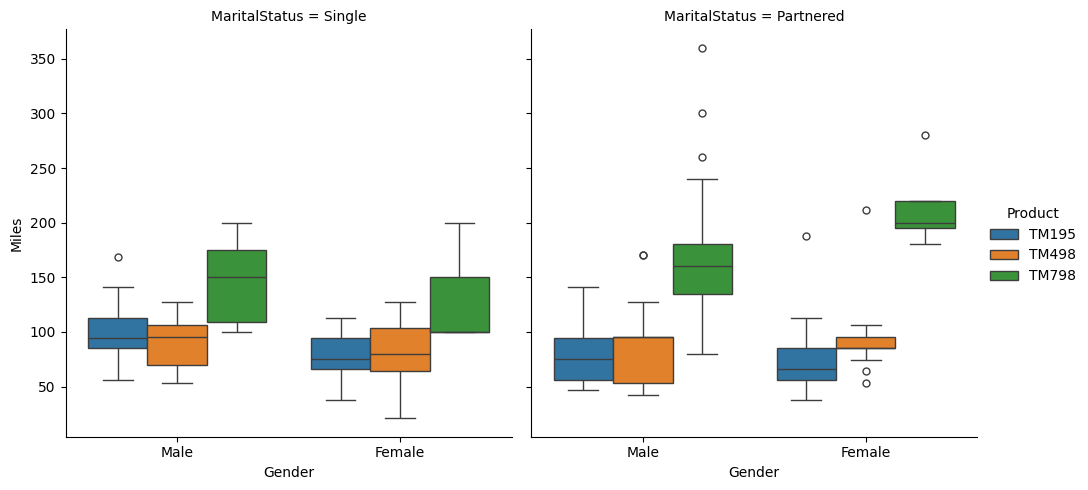

In [53]:
sns.catplot(data=data, x="Gender", y="Miles", hue="Product", palette="bright", col="MaritalStatus", kind="box")

# Relationship between variables

Next, we look at whether any relationship exists between the numerical variables.

The question is whether there exists any correlation between these variables.
This will help us understand whether an increase in one variable affects another variable in any way.

Notice the high positive correlation between miles and usage and an average positive relationship between income and age and income and usage.

It is expected that the more you use the treadmill the more the miles you accrue.

We can also see these relationships from a scatter plot.

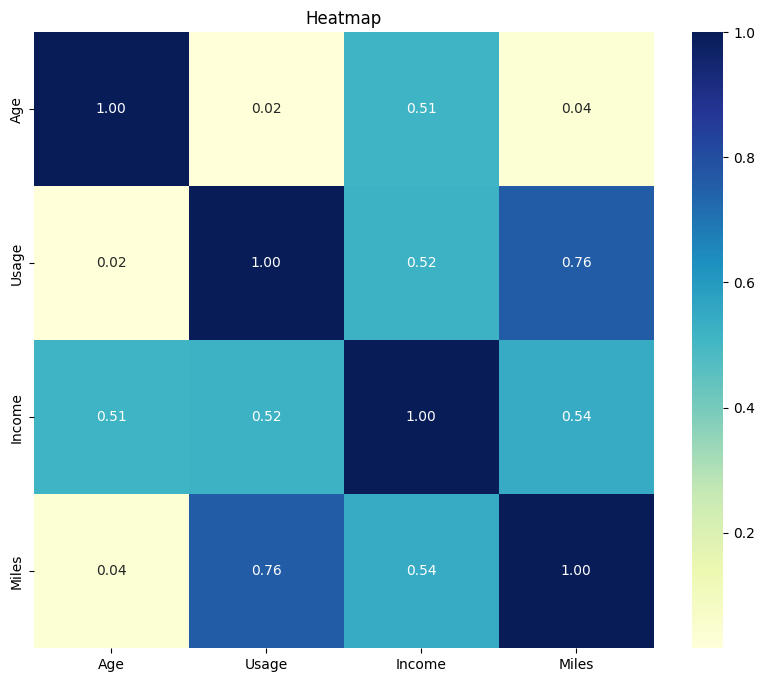

In [6]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_vars].corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap')
plt.show()